In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from os import path

## Wykresy i podsumowania wyników metryk
W tym notebooku nie korzystamy z naszego pakietu, służy tylko do analizy danych o metrykach i stworzeniu wykresów do pracy/prezentacji/plakatu.

In [2]:
metrics_dir = path.join('..', '..', 'input', 'sesame_metrics')
results_dir = path.join('..', 'results')
images_dir = path.join('..', '..', 'thesis_images')

# Sesame dataset

## Metrics for input (`Captum`) explanations

In [3]:
df = pd.DataFrame()
for i in range(16):
    df = pd.concat([df,pd.read_csv(path.join(metrics_dir, 'input_explanations_{i}.csv'.format(i=i)), index_col=0)], axis=0)
    
df = df.groupby(by=df.index).mean()

In [4]:
df

,DIR0.0,CIR Same0.0,CIR Max0.0,Average Recall0.0,Average Precision0.0,F1_score0.0,IOU0.0,DIR0.1,CIR Same0.1,CIR Max0.1,...,Average Precision0.8,F1_score0.8,IOU0.8,DIR0.9,CIR Same0.9,CIR Max0.9,Average Recall0.9,Average Precision0.9,F1_score0.9,IOU0.9
Gradients,0.46875,0.092362,-0.049253,1.0,0.549989,0.677500,0.549989,0.46875,0.092265,-0.049350,...,0.031250,0.0,6.162508e-07,0.0,-0.000018,-0.000018,2.742498e-08,0.015625,0.0,2.742498e-08
Lime,0.46875,0.092362,-0.049253,1.0,0.550162,0.677637,0.550162,0.46875,0.093056,-0.048559,...,0.014078,0.0,1.985684e-03,0.0,0.000689,0.000689,2.013803e-03,0.014078,0.0,1.985684e-03
Saliency,0.46875,0.092362,-0.049253,1.0,0.549989,0.677500,0.549989,0.03125,-0.003744,-0.004257,...,0.062500,0.0,6.670312e-07,0.0,-0.000031,-0.000031,2.482483e-07,0.062500,0.0,2.482483e-07


In [5]:
metrics_dict = {
    "DIR": "Decision\nImpact Ratio",
    "CIR Same": "Confidence\nImpact Ratio\nSame Pred",
    "CIR Max": "Confidence\nImpact Ratio\n Max Pred",
    "Average Recall": "Average Recall",
    "Average Precision": "Average Precision",
    "F1_score": "F1 score",
    "IOU": "Intersection Over Union"
}

def plot_results(df, legend_labels=None, style=None):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
    for idx, metric in enumerate(["DIR", "CIR Same", "CIR Max", "Average Recall", "Average Precision", "F1_score", "IOU"]):
        metric_df = df.loc[:, [metric in i for i in df.columns]]
        metric_df.columns = [i/10 for i in range(10)]
        metric_df.transpose().plot(title=metrics_dict[metric], xlabel='threshold', ax=ax[idx//3][idx%3], legend=False, style=style)
        ax[idx//3][idx%3].title.set_size(15)
        # y axis
        if idx in [0, 3, 6]:
            ax[idx//3][idx%3].set_ylabel("Metric value", fontsize=13)
        
        # x axis
        if idx not in [4, 5, 6]:
            ax[idx//3][idx%3].get_xaxis().set_ticklabels([])
            ax[idx//3][idx%3].set(xlabel=None)
        else:
            ax[idx//3][idx%3].set_xlabel("Threshold", fontsize=13)
        # get handles to legend    
        if idx == 6:
            h, l = ax[idx//3][idx%3].get_legend_handles_labels()
    
    l = l if legend_labels is None else legend_labels
    if len(l) >= 6:
        lenght = len(l)
        l1, h1 = l[:(lenght//2)], h[:(lenght//2)]
        l2, h2 = l[(lenght//2):], h[(lenght//2):]
        ax[2][1].legend(h1, l1, loc='center', fontsize='xx-large', frameon=False, markerscale=2)
        ax[2][2].legend(h2, l2, loc='center', fontsize='xx-large', frameon=False, markerscale=2)

    else:
        ax[2][1].legend(h, l, loc='center', fontsize='xx-large', frameon=False, markerscale=2)
        
    ax[2][2].set_axis_off()
    ax[2][1].set_axis_off()


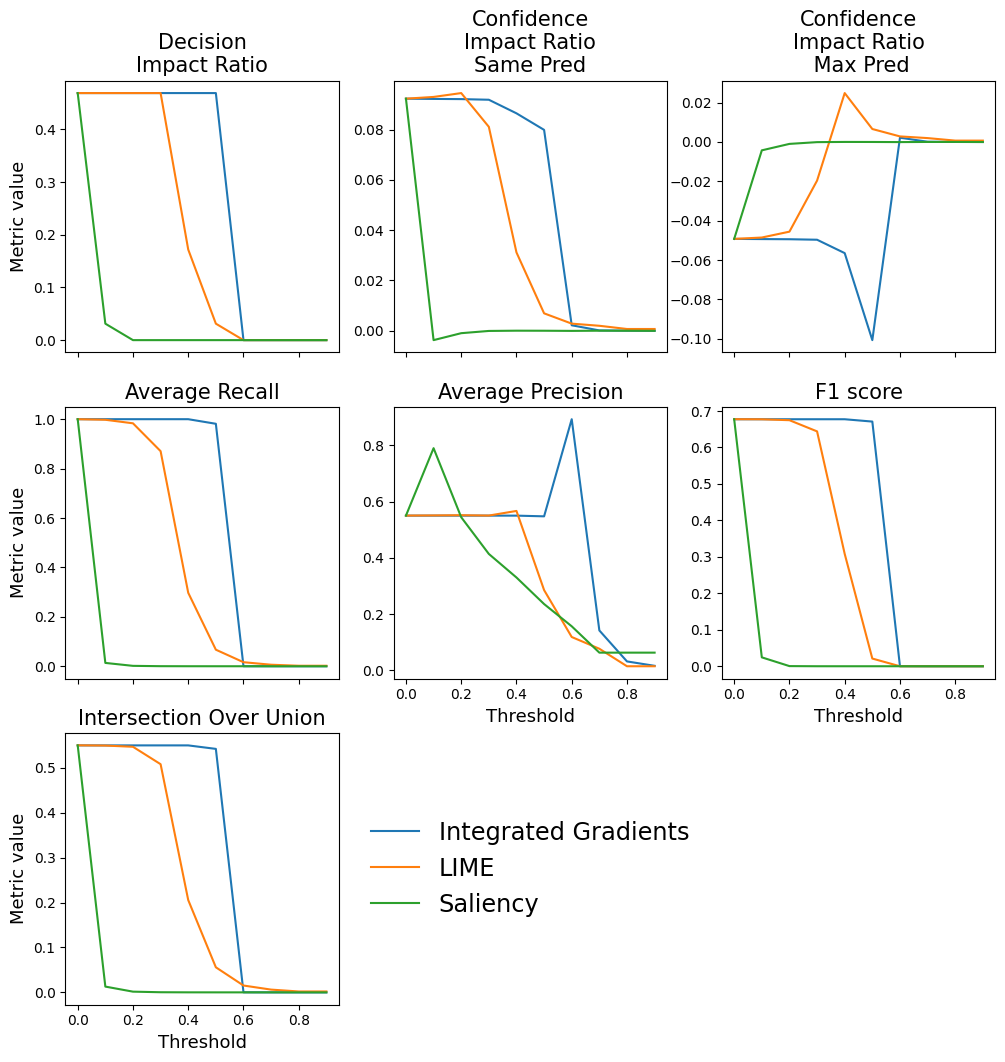

In [6]:
plot_results(df, ['Integrated Gradients', 'LIME', 'Saliency'])
plt.savefig(path.join(images_dir, "crop_weed_explanations_metrics2.png"), dpi = 500)

## Metrics for aggregates

In [5]:
df_agg = pd.DataFrame()
for i in range(16):
    df_agg = pd.concat([df_agg,pd.read_csv(path.join(metrics_dir, 'agg_explanations_{i}.csv'.format(i=i)), index_col=0)], axis=0)
    
df_agg = df_agg.groupby(by=df_agg.index).mean()

In [6]:
df_agg

,DIR0.0,CIR Same0.0,CIR Max0.0,Average Recall0.0,Average Precision0.0,F1_score0.0,IOU0.0,DIR0.1,CIR Same0.1,CIR Max0.1,...,Average Precision0.8,F1_score0.8,IOU0.8,DIR0.9,CIR Same0.9,CIR Max0.9,Average Recall0.9,Average Precision0.9,F1_score0.9,IOU0.9
Autoweighted,0.46875,0.092327,-0.049288,1.000000,0.550046,0.677545,0.550046,0.46875,0.090385,-0.05123,...,0.014078,0.000000,0.000668,0.000000,0.000335,0.000335,0.000671,0.014078,0.000000,0.000668
SupervisedXAI auto,0.46875,0.091021,-0.055573,0.999714,0.552360,0.679229,0.552185,0.46875,0.079441,-0.00136,...,0.960265,0.342807,0.219570,0.015625,0.014844,0.014669,0.128235,0.965208,0.213149,0.125095
SupervisedXAI no weights,0.46875,0.091021,-0.055573,0.999714,0.552360,0.679229,0.552185,0.46875,0.089953,-0.02259,...,0.898080,0.604291,0.443727,0.031250,0.029007,0.027240,0.352554,0.938039,0.470391,0.319440


In [9]:
pd.concat([df, df_agg]).to_csv(path.join(results_dir, 'sesame_aggregated_results.csv'))

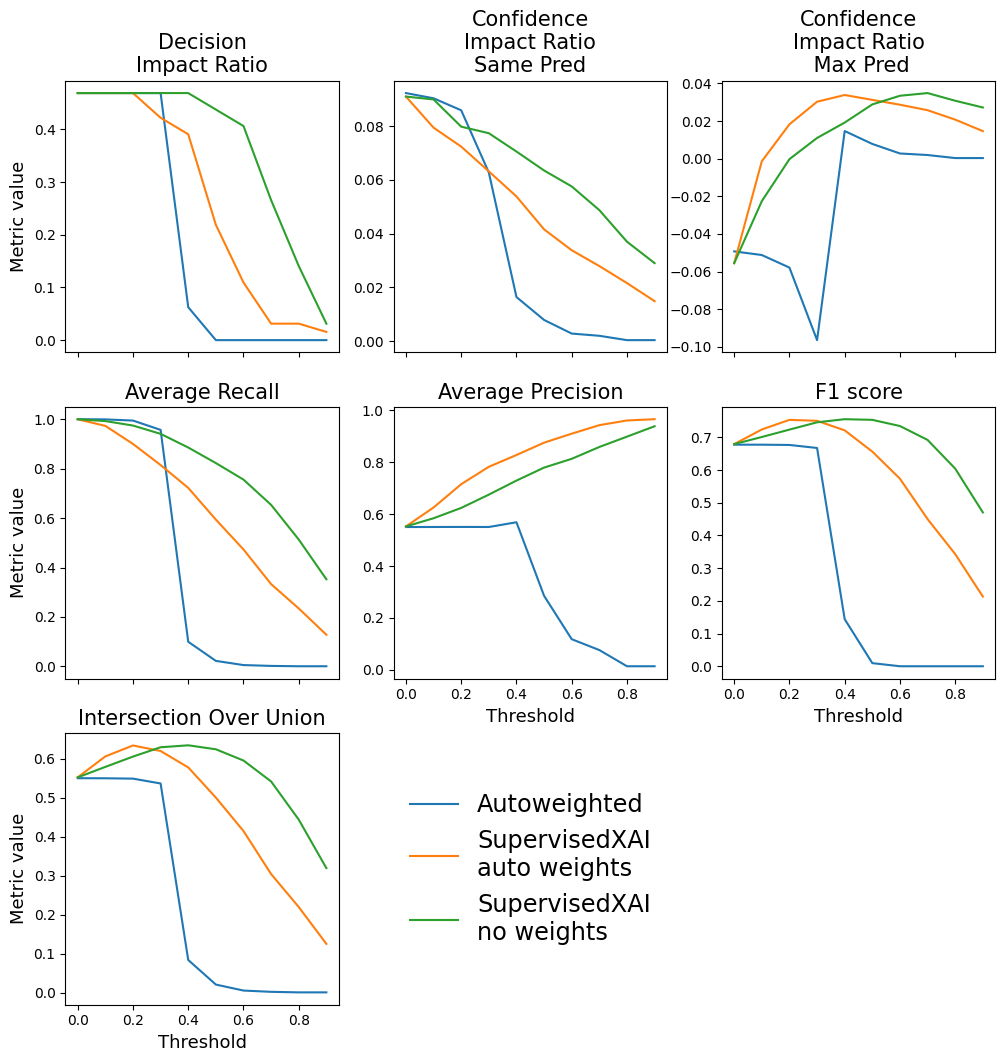

In [10]:
plot_results(df_agg, ['Autoweighted', 'SupervisedXAI\nauto weights', 'SupervisedXAI\nno weights'])
plt.savefig(path.join(images_dir, "crop_weed_aggregated_explanations_metrics.png"), dpi = 500)

In [9]:
df_autoweigthed = pd.concat([df, df_agg]).iloc[0:4, :]

In [11]:
df_autoweigthed.loc[:, ['DIR' in i for i in df_autoweigthed.columns]]

,DIR0.0,DIR0.1,DIR0.2,DIR0.3,DIR0.4,DIR0.5,DIR0.6,DIR0.7,DIR0.8,DIR0.9
Gradients,0.46875,0.46875,0.46875,0.46875,0.468750,0.46875,0.0,0.0,0.0,0.0
Lime,0.46875,0.46875,0.46875,0.46875,0.171875,0.03125,0.0,0.0,0.0,0.0
Saliency,0.46875,0.03125,0.00000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0
Autoweighted,0.46875,0.46875,0.46875,0.46875,0.062500,0.00000,0.0,0.0,0.0,0.0


In [13]:
df_autoweigthed.loc[:, ['CIR Same' in i for i in df_autoweigthed.columns]]

,CIR Same0.0,CIR Same0.1,CIR Same0.2,CIR Same0.3,CIR Same0.4,CIR Same0.5,CIR Same0.6,CIR Same0.7,CIR Same0.8,CIR Same0.9
Gradients,0.092362,0.092265,0.092190,0.091937,0.086534,0.079943,0.002168,0.000122,0.000022,-0.000018
Lime,0.092362,0.093056,0.094592,0.081158,0.031171,0.006921,0.002823,0.001969,0.000689,0.000689
Saliency,0.092362,-0.003744,-0.000977,-0.000085,0.000017,-0.000003,-0.000065,0.000010,0.000006,-0.000031
Autoweighted,0.092327,0.090385,0.085914,0.062738,0.016376,0.007845,0.002777,0.001952,0.000335,0.000335


In [15]:
df_autoweigthed.loc[:, ['CIR Max' in i for i in df_autoweigthed.columns]]

,CIR Max0.0,CIR Max0.1,CIR Max0.2,CIR Max0.3,CIR Max0.4,CIR Max0.5,CIR Max0.6,CIR Max0.7,CIR Max0.8,CIR Max0.9
Gradients,-0.049253,-0.049350,-0.049425,-0.049678,-0.056477,-0.100693,0.002168,0.000122,0.000022,-0.000018
Lime,-0.049253,-0.048559,-0.045574,-0.019635,0.024843,0.006585,0.002823,0.001969,0.000689,0.000689
Saliency,-0.049253,-0.004257,-0.000977,-0.000085,0.000017,-0.000003,-0.000065,0.000010,0.000006,-0.000031
Autoweighted,-0.049288,-0.051230,-0.057913,-0.096493,0.014698,0.007845,0.002777,0.001952,0.000335,0.000335


In [16]:
df_autoweigthed.loc[:, ['Recall' in i for i in df_autoweigthed.columns]]

,Average Recall0.0,Average Recall0.1,Average Recall0.2,Average Recall0.3,Average Recall0.4,Average Recall0.5,Average Recall0.6,Average Recall0.7,Average Recall0.8,Average Recall0.9
Gradients,1.0,1.000000,1.000000,0.999998,0.999973,0.981419,0.000144,0.000003,6.162508e-07,2.742498e-08
Lime,1.0,0.997650,0.983332,0.870542,0.297337,0.067000,0.016359,0.006180,2.013803e-03,2.013803e-03
Saliency,1.0,0.013476,0.001608,0.000293,0.000064,0.000019,0.000005,0.000002,6.670312e-07,2.482483e-07
Autoweighted,1.0,0.999217,0.994444,0.956811,0.099736,0.022347,0.005454,0.002060,6.712679e-04,6.712679e-04


In [17]:
df_autoweigthed.loc[:, ['Precision' in i for i in df_autoweigthed.columns]]

,Average Precision0.0,Average Precision0.1,Average Precision0.2,Average Precision0.3,Average Precision0.4,Average Precision0.5,Average Precision0.6,Average Precision0.7,Average Precision0.8,Average Precision0.9
Gradients,0.549989,0.549989,0.549989,0.549988,0.549984,0.547502,0.893141,0.141506,0.031250,0.015625
Lime,0.550162,0.550700,0.551444,0.550225,0.566723,0.285080,0.118143,0.076396,0.014078,0.014078
Saliency,0.549989,0.790011,0.544348,0.413712,0.329866,0.235439,0.156250,0.062500,0.062500,0.062500
Autoweighted,0.550046,0.550207,0.550452,0.550185,0.568408,0.285146,0.118197,0.076396,0.014078,0.014078


In [18]:
df_autoweigthed.loc[:, ['F1' in i for i in df_autoweigthed.columns]]

,F1_score0.0,F1_score0.1,F1_score0.2,F1_score0.3,F1_score0.4,F1_score0.5,F1_score0.6,F1_score0.7,F1_score0.8,F1_score0.9
Gradients,0.677500,0.677500,0.677500,0.677499,0.677489,0.671101,0.000288,0.0,0.0,0.0
Lime,0.677637,0.677360,0.674869,0.644186,0.308178,0.021101,0.000000,0.0,0.0,0.0
Saliency,0.677500,0.024407,0.000412,0.000029,0.000000,0.000000,0.000000,0.0,0.0,0.0
Autoweighted,0.677545,0.677449,0.676648,0.667425,0.143889,0.009523,0.000000,0.0,0.0,0.0


In [19]:
df_autoweigthed.loc[:, ['IOU' in i for i in df_autoweigthed.columns]]

,IOU0.0,IOU0.1,IOU0.2,IOU0.3,IOU0.4,IOU0.5,IOU0.6,IOU0.7,IOU0.8,IOU0.9
Gradients,0.549989,0.549989,0.549989,0.549987,0.549974,0.542200,0.000144,0.000003,6.162508e-07,2.742498e-08
Lime,0.550162,0.549615,0.546885,0.508115,0.205536,0.055831,0.015243,0.006147,1.985684e-03,1.985684e-03
Saliency,0.549989,0.012868,0.001600,0.000292,0.000064,0.000019,0.000005,0.000002,6.670312e-07,2.482483e-07
Autoweighted,0.550046,0.549849,0.548937,0.536532,0.083750,0.020688,0.005308,0.002056,6.681141e-04,6.681141e-04


# ImageNet

In [11]:
df_imagenet = pd.read_csv(path.join(results_dir, 'imagenet_aggregated_results.csv'), index_col=0)
df_imagenet

,DIR0.0,CIR Same0.0,CIR Max0.0,Average Recall0.0,Average Precision0.0,F1_score0.0,IOU0.0,DIR0.1,CIR Same0.1,CIR Max0.1,...,Average Precision0.8,F1_score0.8,IOU0.8,DIR0.9,CIR Same0.9,CIR Max0.9,Average Recall0.9,Average Precision0.9,F1_score0.9,IOU0.9
Baseline_black,0.046,0.001227,0.001002,0.000060,0.720000,0.000000,0.000060,0.046,0.001227,0.001002,...,0.720000,0.000000,0.000060,0.046,0.001227,0.001002,0.000060,0.720000,0.000000,0.000060
Baseline_white,1.000,0.371730,0.371730,1.000000,0.363176,0.487792,0.363176,1.000,0.371730,0.371730,...,0.363176,0.487792,0.363176,1.000,0.371730,0.371730,1.000000,0.363176,0.487792,0.363176
Baseline_masks,0.820,0.098913,-0.252741,1.000000,1.000000,1.000000,1.000000,0.820,0.098913,-0.252741,...,1.000000,1.000000,1.000000,0.820,0.098913,-0.252741,1.000000,1.000000,1.000000,1.000000
Gradients,1.000,0.371730,0.371730,1.000000,0.363176,0.487792,0.363176,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Saliency,1.000,0.371730,0.371730,1.000000,0.363202,0.487818,0.363202,0.572,0.057123,-0.050410,...,0.166099,0.000000,0.000241,0.040,0.000666,-0.000263,0.000161,0.147492,0.000000,0.000161
Occlusion 25,0.718,0.061995,-0.098508,0.521260,0.366747,0.372734,0.250363,0.450,0.019022,-0.040330,...,0.067433,0.000000,0.006951,0.048,0.002463,-0.002690,0.009424,0.049588,0.000000,0.006176
Occlusion 15,0.838,0.132525,-0.151390,0.515161,0.364975,0.376327,0.248196,0.472,0.038828,-0.033799,...,0.046808,0.000000,0.004175,0.018,0.000611,-0.001369,0.005149,0.035024,0.000000,0.003630
Min Aggregate,0.742,0.070192,-0.096602,0.389892,0.368475,0.000000,0.207321,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Avg Aggregate,0.838,0.150262,-0.167538,0.578825,0.362077,0.394773,0.266290,0.368,0.021617,-0.029371,...,0.014385,0.000000,0.002004,0.004,0.001199,-0.000156,0.002821,0.011115,0.000000,0.001604
Max Aggregate,1.000,0.371730,0.371730,1.000000,0.363176,0.487792,0.363176,0.662,0.080496,-0.079370,...,0.201609,0.000000,0.008095,0.082,0.002368,-0.003855,0.010430,0.174758,0.000000,0.007095


## `Captum` explanations

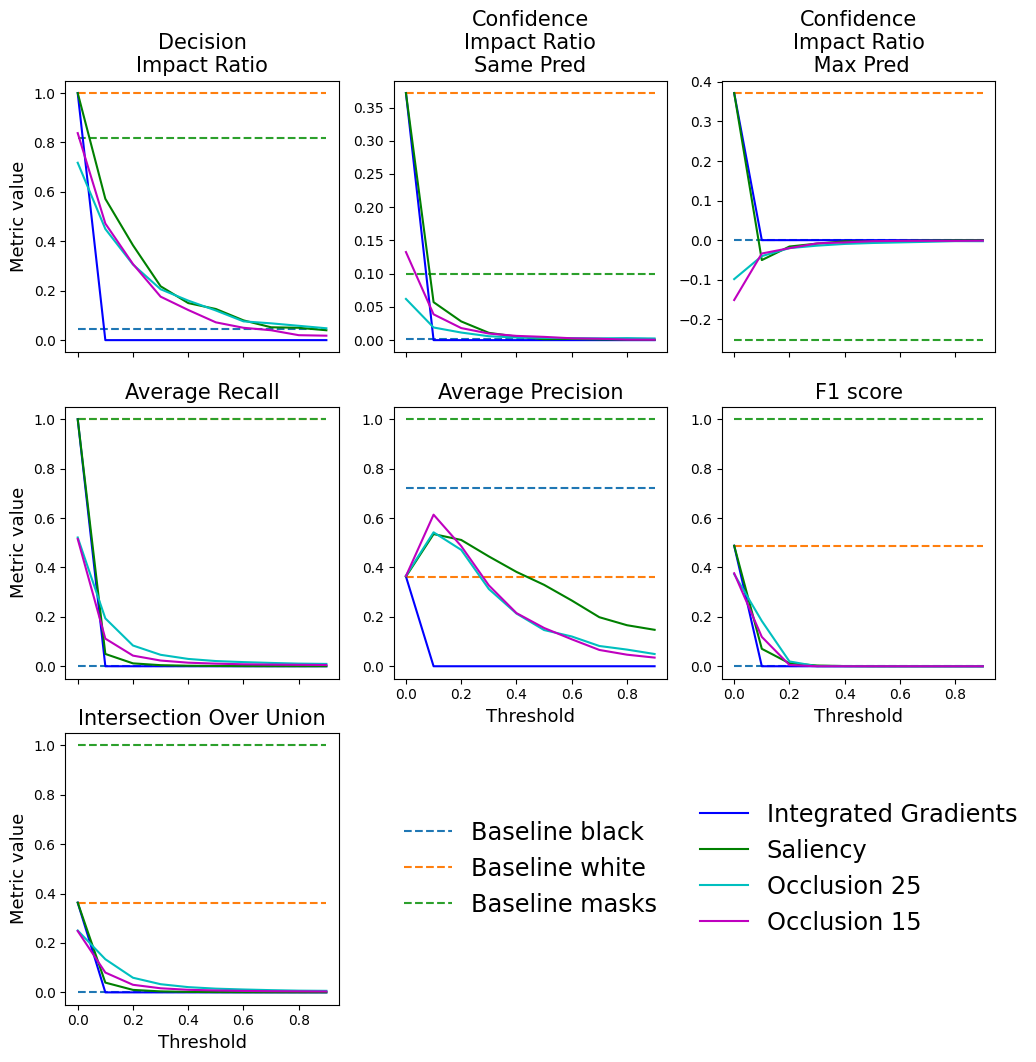

In [12]:
imagenet_in = df_imagenet.loc[['Baseline_black', 'Baseline_white', 'Baseline_masks',
                 'Gradients', 'Saliency', 'Occlusion 25', 'Occlusion 15'],:]

styles = ['--', '--', '--', 'b-', 'g', 'c', 'm']
labels = ['Baseline black',
          'Baseline white',
          'Baseline masks',
          'Integrated Gradients',
          'Saliency',
          'Occlusion 25',
          'Occlusion 15']

plot_results(imagenet_in, legend_labels=labels, style=styles)
plt.savefig(path.join(images_dir, "image_net_explanations_metrics.png"), dpi = 500)

## Basic aggregation

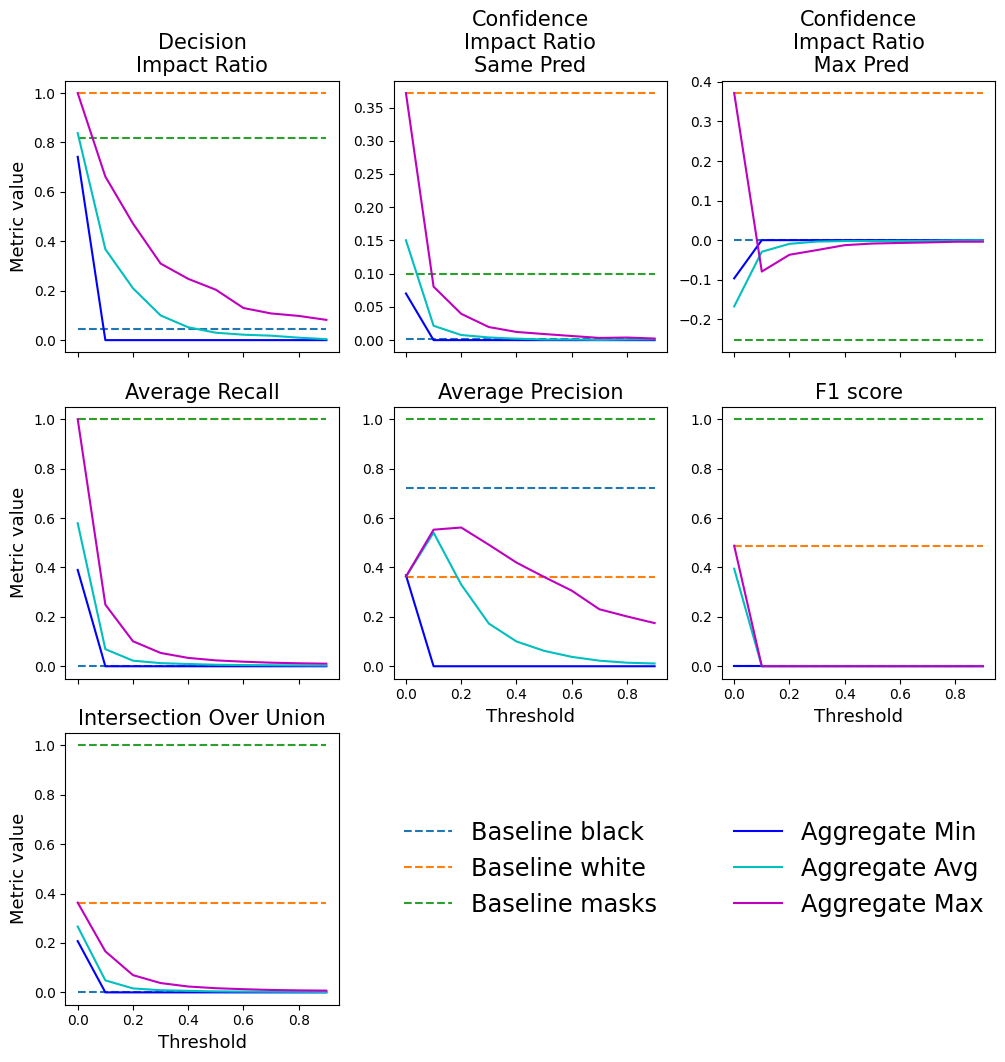

In [13]:
imagenet_basic = df_imagenet.loc[['Baseline_black', 'Baseline_white', 'Baseline_masks',
                 'Min Aggregate', 'Avg Aggregate', 'Max Aggregate'],:]

styles = ['--', '--', '--', 'b', 'c', 'm']
labels = ['Baseline black',
          'Baseline white',
          'Baseline masks',
          'Aggregate Min',
          'Aggregate Avg',
          'Aggregate Max']

plot_results(imagenet_basic, legend_labels=labels, style=styles)
plt.savefig(path.join(images_dir, "image_net_basic_agg_metrics.png"), dpi = 500)

## Supervised ensemble

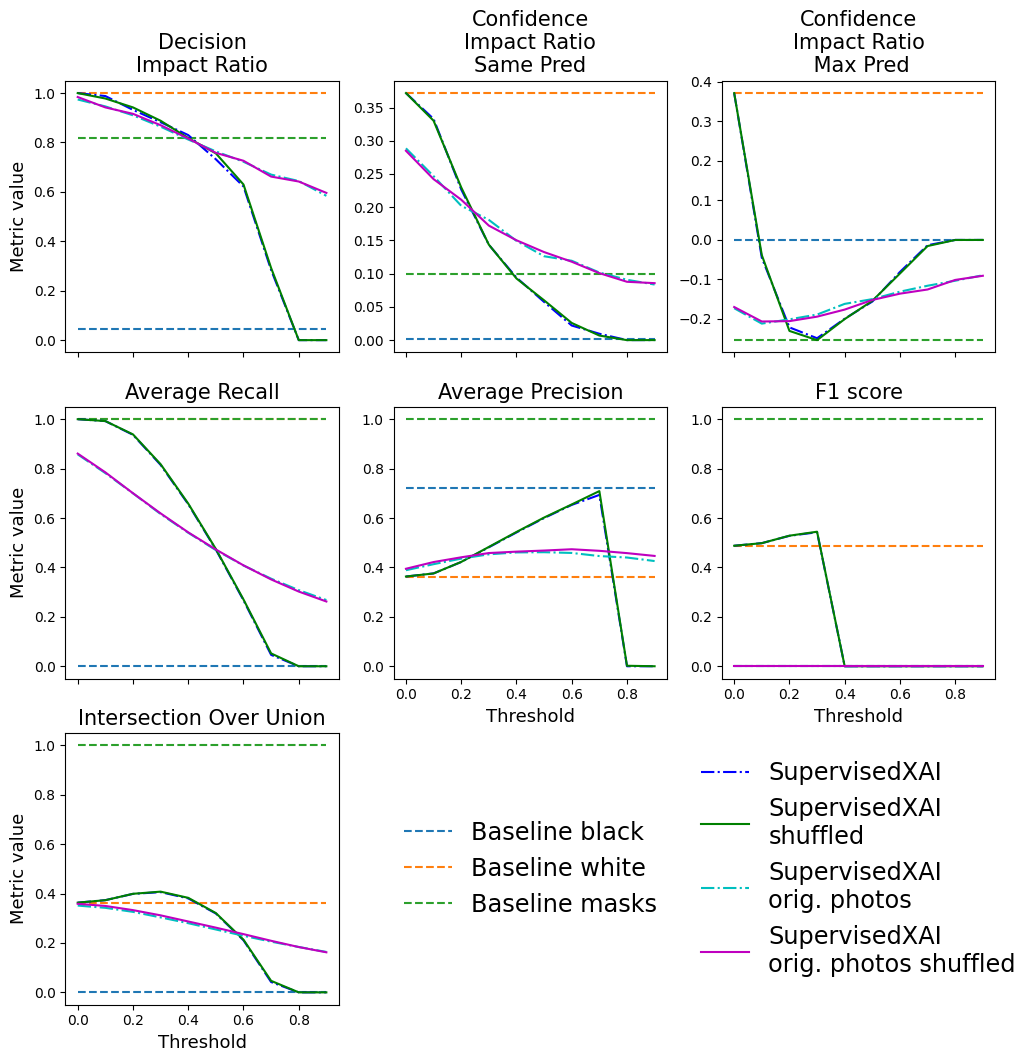

In [14]:
imagenet_supervised = df_imagenet.loc[['Baseline_black', 'Baseline_white', 'Baseline_masks',
                 'SE', 'SES', 'SEWOD', 'SEWODS'],:]

styles = ['--', '--', '--', 'b-.', 'g', 'c-.', 'm']
labels = ['Baseline black',
          'Baseline white',
          'Baseline masks',
          'SupervisedXAI',
          'SupervisedXAI\nshuffled',
          'SupervisedXAI\norig. photos',
          'SupervisedXAI\norig. photos shuffled']

plot_results(imagenet_supervised, legend_labels=labels, style=styles)
plt.savefig(path.join(images_dir, "image_net_krr_agg_metrics.png"), dpi = 500)